# Task 3 - Qiskit Aer Simulator

Tasks 1 and 2 only involve visualizing the states and the circuits using Qiskit.
To view the results of measurements, we need a simulator to run those circuits. Qiskit Aer is a powerful simulator for that matter.

In [12]:
# Add imports here, no code other than imports in this cell
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

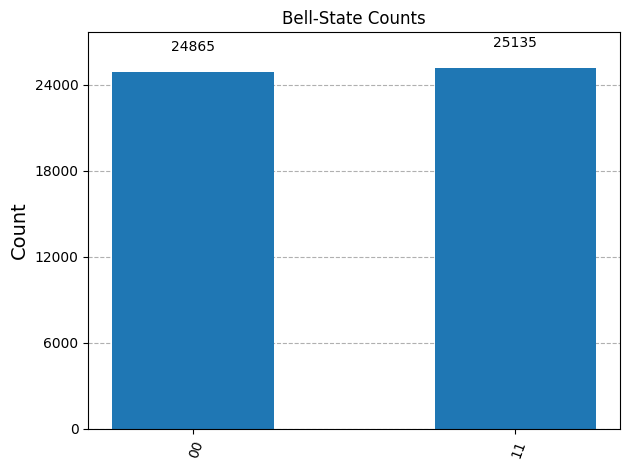

In [10]:
# Task 3.1 - Create a Bell pair circuit. Add measurements to all qubits.
# Take shots=10,000 and use all methods ('statevector', 'stabilizer', 'extended_stabilizer', 'density_matrix', 'matrix_product_state') to run the circuit and get the counts.
# Plot the counts in one histogram.
# Note: Some methods may take longer time to run.
bell_circuit = QuantumCircuit(2, 2)
bell_circuit.h(0)
bell_circuit.cx(0,1)
bell_circuit.measure(range(2), range(2))
total_counts = {"00":0,"11":0}
for method in ['statevector', 'stabilizer', 'extended_stabilizer', 'density_matrix', 'matrix_product_state']:
    backend = AerSimulator(method=method)
    bell_circuit = transpile(bell_circuit, backend)
    job_sim = backend.run(bell_circuit, shots=10000)
    result = job_sim.result()
    counts = result.get_counts(bell_circuit)
    total_counts["00"] += counts["00"]
    total_counts["11"] += counts["11"]
plot_histogram(total_counts, title = "Bell-State Counts")

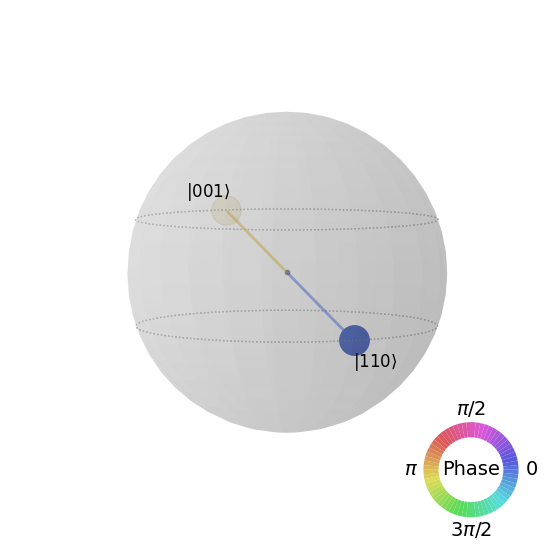

In [24]:
# Task 3.2 - Create a Cat state 1/sqrt(2)(|001> - |110>). Visualize the state using a qsphere.
cat_circ = QuantumCircuit(3, 3)
cat_circ.h(2)
cat_circ.s(2)
cat_circ.s(2)
cat_circ.cx(2,0)
cat_circ.cx(2,1)
cat_circ.x(0)
state = Statevector.from_int(0, 2**3)
state = state.evolve(cat_circ)
state.draw('qsphere')
# print(state)

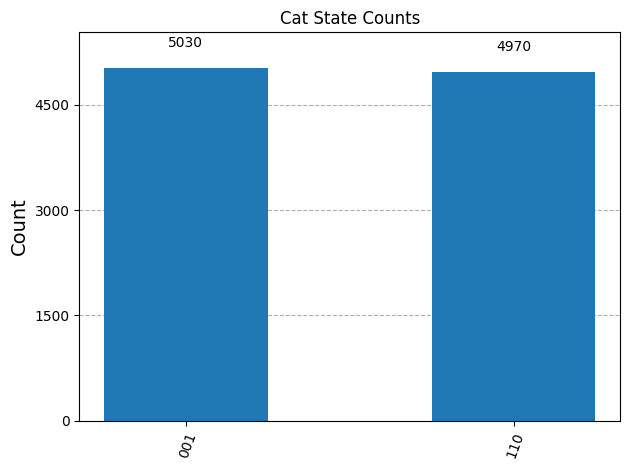

In [25]:
# Task 3.3 - Plot the histogram of the results of Task 3.2 after adding measurements to all qubits and running the circuit with shots=10,000 using density_matrix method.
cat_circ.measure(range(3),range(3))
backend = AerSimulator(method='density_matrix')
cat_circ = transpile(cat_circ, backend)
job_sim = backend.run(cat_circ, shots=10000)
result = job_sim.result()
counts = result.get_counts(cat_circ)
plot_histogram(counts, title = "Cat State Counts")